<a href="https://colab.research.google.com/github/cuimingyang1996/Azog/blob/master/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## import necessary packages !

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# very first u have to create a SQL connection to our SQLite database

con = sqlite3.connect ('/content/drive/My Drive/Zomato/zomato.sqlite')

In [ ]:
df = pd.read_sql_query("SELECT * FROM Users", con)

In [ ]:
df.shape

(51717, 18)

### 2.. Do data cleaning/Data preparation !

In [ ]:
df.isnull().sum() ## returns total missing values in every column

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df.dtypes ## tells data-types ofb every feature !

index                           int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', None, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)']= df['approx_cost(for two people)'].str.replace(',', '')
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', None, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [ ]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [ ]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [ ]:
df['approx_cost(for two people)']

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost(for two people), Length: 51717, dtype: float64

In [ ]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
df['rate'] = df['rate'].str.replace('/5', '')
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       None, '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate'] = df['rate'].astype(str)

In [ ]:
df['rate'].replace('NEW',np.nan,inplace = True)
df['rate'].replace('None',np.nan,inplace = True)
df['rate'].replace('-',np.nan,inplace = True)

In [ ]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', nan, '2.9', '3.5', '2.6',
       '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '3.7 ',
       '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ', '3.2 ',
       '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8', '4.6 ',
       '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [ ]:
df['rate'] = df['rate'].astype(float)

In [ ]:
df['rate'].isnull().sum()

10052

In [ ]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [ ]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [ ]:
df['rest_type'].isnull().sum()

227

In [ ]:
data = df.dropna(subset=['rest_type'])

In [ ]:
data.shape

(51490, 18)

In [ ]:
df['rest_type'].dtype

dtype('O')

In [ ]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [ ]:
data_qb = data[data['rest_type'].str.contains('Quick Bites')]

In [ ]:
data_qb['dish_liked']

3                                              Masala Dosa
23                                         Pasta, Iced Tea
26                                                    None
31       Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...
34       Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              Burgers
Name: dish_liked, Length: 20639, dtype: object

Problem Statements:
1. Analysing most famous dishes of most famous restaurant

In [ ]:
data_qb['dish_liked'].str.lower()

3                                              masala dosa
23                                         pasta, iced tea
26                                                    None
31       burgers, lassi, chicken grill, naan, momos, ch...
34       rolls, veggie wrap, chocolate fantasy, rice bo...
                               ...                        
51641                                                 None
51642                                                 None
51643                                                 None
51644                                                 None
51645                                              burgers
Name: dish_liked, Length: 20639, dtype: object

In [ ]:
all_dishes = data_qb['dish_liked'].str.lower().str.cat()

In [ ]:
!pip install wordcloud

In [ ]:
import wordcloud
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud().generate(all_dishes)

(-0.5, 399.5, 199.5, -0.5)

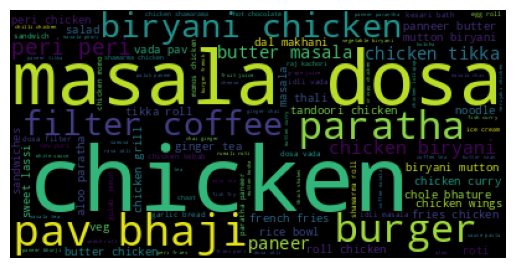

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
df[['rate','reviews_list']]

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."
...,...,...
51712,3.6,"[('Rated 5.0', ""RATED\n Food and service are ..."
51713,NaN,[]
51714,NaN,[]
51715,4.3,"[('Rated 4.0', 'RATED\n Nice and friendly pla..."


In [ ]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NaN,0,+91 8050884222,Banashankari,Quick Bites,None,North Indian,150.0,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield


In [ ]:
df[df['rate'].isnull()].index

Index([   72,    75,    84,    90,    91,    92,   107,   110,   113,   114,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10052)

In [ ]:
df['rate'][72]

nan

In [ ]:
df['reviews_list'][72]

"[('Rated 4.0', 'RATED\\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'), ('Rated 5.0', 'RATED\\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]"

How to extract the 4.0 rating?

In [ ]:
df['reviews_list'][84]

"[('Rated 4.0', 'RATED\\n  Good Location. Small restaurant.\\n\\nNice tasty snacks. Had many items here. Snacks are very good. Tea n coffee to all juices available.\\n\\nYesterday had Sharjah the same taste of kerala.\\n\\nVery good experience')]"

In [ ]:
import ast

In [ ]:
ast.literal_eval(df['reviews_list'][84])

[('Rated 4.0',
  'RATED\n  Good Location. Small restaurant.\n\nNice tasty snacks. Had many items here. Snacks are very good. Tea n coffee to all juices available.\n\nYesterday had Sharjah the same taste of kerala.\n\nVery good experience')]

In [ ]:
type(df['reviews_list'][72])

str

In [ ]:
ast.literal_eval(df['reviews_list'][72])

[('Rated 4.0',
  'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served'),
 ('Rated 5.0',
  'RATED\n  Awesome taste, feel rich taste of food, cleanness is very good, very friendly nature by the hotel person, totally awesome, all the best gud luck')]

This is a list of tuples

In [ ]:
first_input = ast.literal_eval(df['reviews_list'][72])[0]

In [ ]:
first_input

('Rated 4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served')

In [ ]:
[i.replace('Rated','').strip() for i in first_input]

['4.0',
 'RATED\n  cost for chicken rolls is very high but fine taste by pandey and is crew. pls deduct the cost of rolls and great variety of food is been served']

In [ ]:
[i.replace('Rated','').strip() for i in first_input][0]

'4.0'

In [ ]:
float([i.replace('Rated','').strip() for i in first_input][0])

4.0

In [ ]:
def get_Rate(x):
  list_of_reviews = ast.literal_eval(x)

  if list_of_reviews is None or len(list_of_reviews)<=1:
    return None
  else:
    first_input = list_of_reviews[0]
    rate = float([i.replace('Rated','').strip() for i in first_input][0])
    return rate

In [ ]:
df['reviews_list'].apply(get_Rate)

0        4.0
1        4.0
2        3.0
3        4.0
4        4.0
        ... 
51712    5.0
51713    NaN
51714    NaN
51715    4.0
51716    5.0
Name: reviews_list, Length: 51717, dtype: float64

In [ ]:
df['rate_from_review_list'] = df['reviews_list'].apply(get_Rate)

In [ ]:
get_Rate(df['reviews_list'][72])

4.0

In [ ]:
nan_index = df[df['rate'].isnull()].index

In [ ]:
df['rate_from_review_list'][72]

4.0

In [ ]:
df['rate'][72]

nan

In [ ]:
df['rate'][72] = df['rate_from_review_list'][72]

<ipython-input-59-dfd13c9afda3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'][72] = df['rate_from_review_list'][72]


In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
df['rate'][72]

4.0

In [ ]:
df['rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713     True
51714     True
51715    False
51716    False
Name: rate, Length: 51717, dtype: bool

In [ ]:
df[df['rate'].isnull()]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rate_from_review_list
75,75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NaN,0,+91 8553206035,Banashankari,"Takeaway, Delivery",None,"Street Food, Fast Food",500.0,[],[],Delivery,Banashankari,NaN
84,84,https://www.zomato.com/bangalore/chill-out-ban...,"161/C, 6th Main, 80 Feet Road, Bhuvaneshwari N...",Chill Out,No,No,NaN,0,+91 9341215167,Banashankari,Quick Bites,None,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,Banashankari,NaN
90,90,https://www.zomato.com/bangalore/me-and-my-cak...,"BDA Shopping Complex, 24th Cross Road, Siddann...",Me And My Cake,No,No,NaN,0,+91 9036070410,Banashankari,Delivery,None,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,Banashankari,1.0
91,91,https://www.zomato.com/bangalore/sunsadm-banas...,"Shop 18 , 3rd cross road,Markandeya Layout, Ba...",Sunsadm,No,No,NaN,0,+91 7829290358,Banashankari,"Takeaway, Delivery",None,South Indian,400.0,[],[],Delivery,Banashankari,NaN
92,92,https://www.zomato.com/bangalore/annapooranesh...,"625, 5th Cross Road, Hanumanthnagar, Banashank...",Annapooraneshwari Mess,No,No,NaN,0,+91 9742009518,Banashankari,Mess,None,South Indian,200.0,[],[],Delivery,Banashankari,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400.0,[],[],Dine-out,Whitefield,NaN
51675,51675,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Drinks & nightlife,Whitefield,NaN
51710,51710,https://www.zomato.com/bangalore/topsy-turvey-...,"2E2, 4th Cross Road, Devasandra Industrial Est...",Topsy Turvey,No,No,NaN,0,+91 9148155994,Whitefield,Bar,None,Finger Food,900.0,"[('Rated 4.0', ""RATED\n A divine joint for Fl...",[],Pubs and bars,Whitefield,NaN
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,None,Finger Food,600.0,[],[],Pubs and bars,Whitefield,NaN


In [ ]:
df[df['rate'].isnull()].index

Index([   75,    84,    90,    91,    92,   107,   110,   113,   114,   115,
       ...
       51636, 51638, 51639, 51642, 51643, 51644, 51675, 51710, 51713, 51714],
      dtype='int64', length=10051)

In [ ]:
nan_index = df[df['rate'].isnull()].index

In [ ]:
df['rate'].isnull().sum()

10051

In [ ]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rate_from_review_list'],
      dtype='object')

In [ ]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                           10051
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rate_from_review_list          16120
dtype: int64

In [ ]:
dataframe = df.drop(['dish_liked','rate_from_review_list'], axis = 1)

In [ ]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


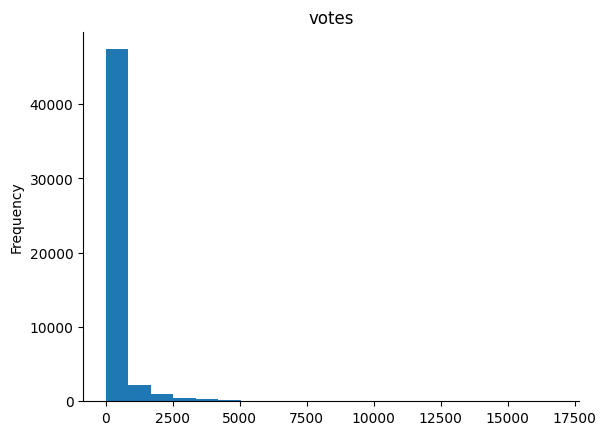

In [ ]:
# @title votes

from matplotlib import pyplot as plt
dataframe['votes'].plot(kind='hist', bins=20, title='votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataframe['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [ ]:
dataframe['cuisines'][0]

'North Indian, Mughlai, Chinese'

In [ ]:
type(dataframe['cuisines'][0])

str

In [ ]:
dataframe['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [ ]:
len(dataframe['cuisines'][0].split(','))

3

In [ ]:
def count(row):
  return len(row.split(','))

In [ ]:
dataframe['total_cuisines'] = dataframe['cuisines'].astype(str).apply(count)
dataframe['multiple_types'] = dataframe['rest_type'].astype(str).apply(count)

In [ ]:
dataframe.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1


In [ ]:
threshold = 3.80
dataframe['target'] = dataframe['rate'].apply(lambda x : 1 if x>=threshold else 0)

In [ ]:
dataframe.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0


In [ ]:
dataframe['target']

0        1
1        1
2        1
3        0
4        1
        ..
51712    0
51713    0
51714    0
51715    1
51716    0
Name: target, Length: 51717, dtype: int64

In [ ]:
dataframe.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'total_cuisines',
       'multiple_types', 'target'],
      dtype='object')

In [ ]:
dataframe[dataframe['target']==0]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2,1,0
6,6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari,4,1,0
19,19,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1,13,+91 9880594520,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400.0,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari,4,1,0
20,20,https://www.zomato.com/bangalore/the-vintage-c...,"146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...",The Vintage Cafe,Yes,No,3.0,62,+91 9880016665\r\n+91 8217311687,Banashankari,Cafe,"Cafe, French, North Indian",400.0,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\...",[],Cafes,Banashankari,3,1,0
21,21,https://www.zomato.com/bangalore/woodee-pizza-...,"3353, 2nd Cross, Opposite Auden School, Hosker...",Woodee Pizza,Yes,No,3.7,180,+91 7406822844,Banashankari,Cafe,"Cafe, Pizza, Fast Food, Beverages",500.0,"[('Rated 3.0', 'RATED\n Decided to take a bre...",[],Cafes,Banashankari,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,4,2,0
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,1,1,0
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,Finger Food,600.0,[],[],Pubs and bars,Whitefield,1,1,0
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,Whitefield,Bar,Finger Food,2000.0,[],[],Pubs and bars,Whitefield,1,1,0


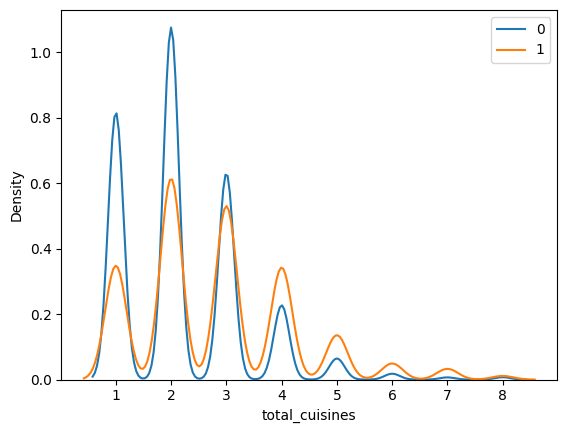

In [ ]:
sns.distplot(dataframe[dataframe['target']==0]['total_cuisines'] , hist=False , label = '0')
sns.distplot(dataframe[dataframe['target']==1]['total_cuisines'] , hist=False , label = '1')
plt.legend()

High overlapping

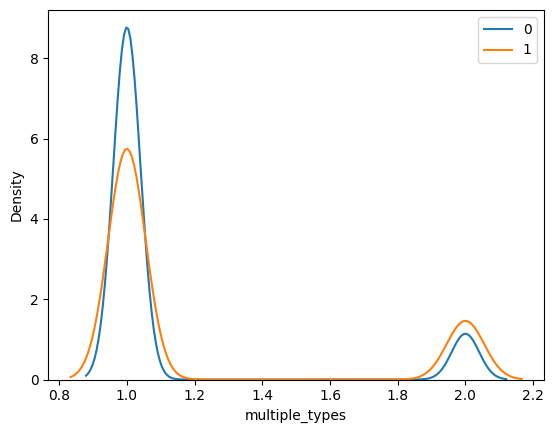

In [ ]:
sns.distplot(dataframe[dataframe['target']==0]['multiple_types'] , hist=False , label = '0')
sns.distplot(dataframe[dataframe['target']==1]['multiple_types'] , hist=False , label = '1')
plt.legend()

In [ ]:
dataframe.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),total_cuisines,multiple_types,target
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3,1,1
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3,1,1
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3,2,1


In [ ]:
dataframe['online_order']

0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
51712     No
51713     No
51714     No
51715     No
51716     No
Name: online_order, Length: 51717, dtype: object

In [ ]:
imp_features = ['online_order', 'book_table',
       'votes',  'location', 'rest_type',
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'target']
data = dataframe[imp_features]

In [ ]:
dataframe = dataframe.dropna()


In [ ]:
data.shape

(40688, 9)

In [ ]:
data['rest_type'].dtype

dtype('O')

In [ ]:
cat_features = [col for col in data.columns if data[col].dtype == 'O']

In [ ]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [ ]:
num_features = [col for col in data.columns if data[col].dtype != 'O']

In [ ]:
num_features

['votes', 'approx_cost(for two people)', 'target']

In [ ]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
for feature in cat_features:
  print('{} has total {} unqiue features'.format(feature, data[feature].nunique()))

online_order has total 2 unqiue features
book_table has total 2 unqiue features
location has total 92 unqiue features
rest_type has total 86 unqiue features
listed_in(type) has total 7 unqiue features
listed_in(city) has total 30 unqiue features


In [ ]:
freq_cat = data["rest_type"].value_counts()[0:5]/len(data)*100

Top 5 category got 80% Replace 20% to Other data

In [ ]:
freq_cat.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery'], dtype='object', name='rest_type')

In [ ]:
 data["rest_type"].isin(freq_cat.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709    False
51711    False
51712    False
51715    False
51716    False
Name: rest_type, Length: 40688, dtype: bool

In [ ]:
data["rest_type"] = data["rest_type"].apply(lambda x : 'other' if x not in freq_cat.index else x)

In [ ]:
data["listed_in(city)"].value_counts()/len(data)*100

listed_in(city)
BTM                      6.257373
Koramangala 7th Block    5.699469
Koramangala 4th Block    5.463527
Koramangala 5th Block    5.448781
Koramangala 6th Block    5.136650
Jayanagar                4.635273
JP Nagar                 3.966772
Indiranagar              3.743118
Church Street            3.681675
MG Road                  3.664471
Brigade Road             3.593197
Lavelle Road             3.519465
Residency Road           3.251573
HSR                      3.222080
Marathahalli             3.143433
Bannerghatta Road        2.936984
Whitefield               2.912407
Old Airport Road         2.836217
Brookefield              2.755112
Basavanagudi             2.585529
Kammanahalli             2.477389
Sarjapur Road            2.457727
Kalyan Nagar             2.413488
Frazer Town              2.315179
Bellandur                2.312721
Malleshwaram             2.297975
Rajajinagar              2.116103
Electronic City          2.010421
Banashankari             1.75727

In [ ]:
data["location"].value_counts()/len(data)*100

location
BTM                      9.400806
Koramangala 5th Block    5.559379
HSR                      4.856469
Indiranagar              4.350177
JP Nagar                 4.156017
                           ...   
Yelahanka                0.009831
West Bangalore           0.007373
Rajarajeshwari Nagar     0.004915
Nagarbhavi               0.002458
Peenya                   0.002458
Name: count, Length: 92, dtype: float64

In [ ]:
pd.get_dummies(data['online_order'],prefix = 'online_order', drop_first = True)

,online_order_Yes
0,True
1,True
2,True
3,False
4,False
...,...
51709,False
51711,False
51712,False
51715,False


In [ ]:
for col in ['online_order','book_table','rest_type','listed_in(type)']:
  col_encoded = pd.get_dummies(data[col],prefix = col, drop_first = True)
  data = pd.concat([data, col_encoded], axis=1)

In [ ]:
data.head()

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,Banashankari,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800.0,Buffet,Banashankari,1,True,...,False,False,False,True,False,False,False,False,False,False
3,No,No,88,Banashankari,Quick Bites,300.0,Buffet,Banashankari,0,False,...,False,False,True,False,False,False,False,False,False,False
4,No,No,166,Basavanagudi,Casual Dining,600.0,Buffet,Banashankari,1,False,...,False,False,False,False,False,False,False,False,False,False


#9 Performing Mean encoding data

In [ ]:
data[['location', 'listed_in(city)']]

,location,listed_in(city)
0,Banashankari,0.478322
1,Banashankari,0.478322
2,Banashankari,0.478322
3,Banashankari,0.478322
4,Basavanagudi,0.478322
...,...,...
51709,Whitefield,0.399156
51711,Whitefield,0.399156
51712,Whitefield,0.399156
51715,"ITPL Main Road, Whitefield",0.399156


In [ ]:
data.groupby(['location'])["target"].mean()

location
BTM                  0.309281
Banashankari         0.480379
Banaswadi            0.256579
Bannerghatta Road    0.290669
Basavanagudi         0.506897
                       ...   
West Bangalore       0.000000
Whitefield           0.394822
Wilson Garden        0.272727
Yelahanka            0.500000
Yeshwantpur          0.223214
Name: target, Length: 92, dtype: float64

In [ ]:
dict_mean_location  = data.groupby(['location'])['target'].mean().to_dict()

In [ ]:
data['location'] = data['location'].map(dict_mean_location) ## lets map "dict_mean_location" on top of "location" feature

In [ ]:
dict_mean_location  = data.groupby(['listed_in(city)'])['target'].mean().to_dict()

In [ ]:
data['listed_in(city)'] = data['listed_in(city)'].map(dict_mean_location) ## lets map "listed_in(city)" on top of "location" feature

In [ ]:
data.head(3)

,online_order,book_table,votes,location,rest_type,approx_cost(for two people),listed_in(type),listed_in(city),target,online_order_Yes,...,rest_type_Delivery,rest_type_Dessert Parlor,rest_type_Quick Bites,rest_type_other,listed_in(type)_Cafes,listed_in(type)_Delivery,listed_in(type)_Desserts,listed_in(type)_Dine-out,listed_in(type)_Drinks & nightlife,listed_in(type)_Pubs and bars
0,Yes,Yes,775,Banashankari,Casual Dining,800.0,Buffet,0.397451,1,True,...,False,False,False,False,False,False,False,False,False,False
1,Yes,No,787,Banashankari,Casual Dining,800.0,Buffet,0.397451,1,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,No,918,Banashankari,other,800.0,Buffet,0.397451,1,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
data.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

In [ ]:
data.drop(['online_order', 'book_table', 'rest_type','listed_in(type)'], axis = 1, inplace = True)

#Handling Outliers

In [ ]:
data['votes'].min()

0

In [ ]:
data['votes'].max()

16832

In [ ]:
from scipy import stats

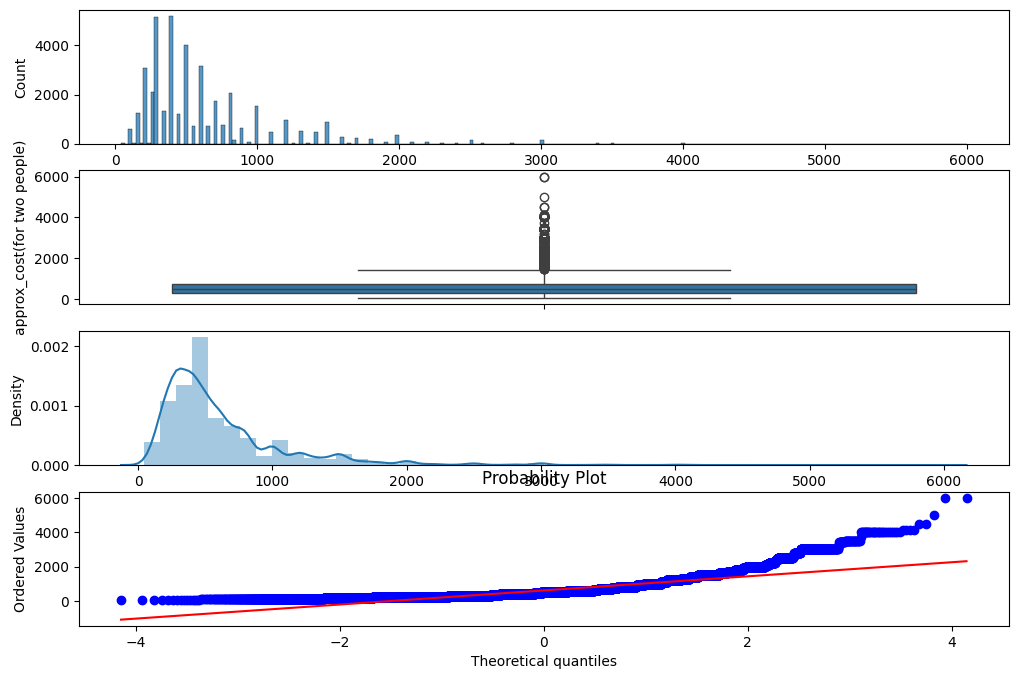

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='Count'>

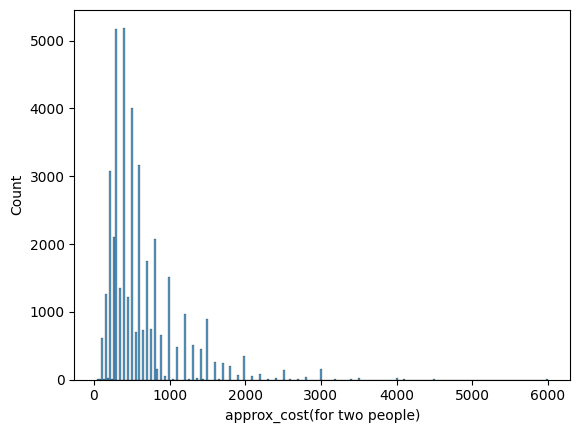

In [ ]:
sns.histplot(data['approx_cost(for two people)'])

In [ ]:
data['approx_cost(for two people)']= np.log1p((data['approx_cost(for two people)']))

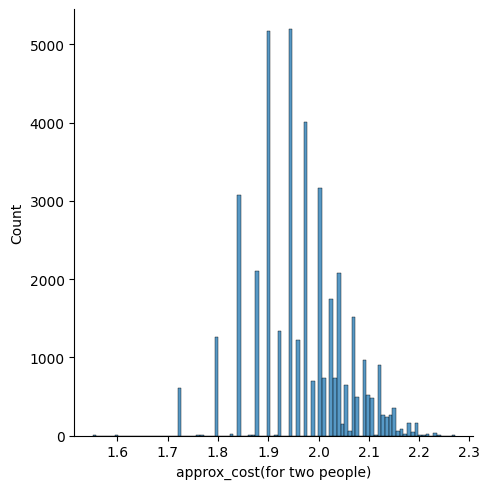

In [ ]:
sns.displot(np.log1p((data['approx_cost(for two people)'])))

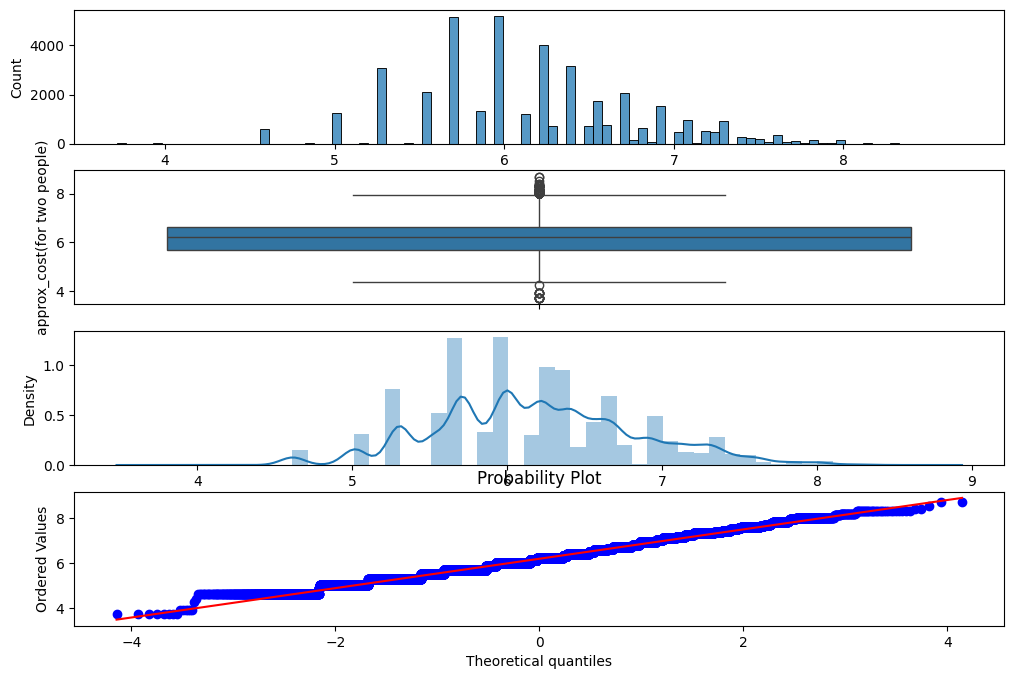

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['approx_cost(for two people)'])

plt.subplot(412)
sns.boxplot(data['approx_cost(for two people)'])

plt.subplot(413)
sns.distplot(data['approx_cost(for two people)'])


plt.subplot(414)
stats.probplot(data['approx_cost(for two people)'] , plot=plt)

plt.show()

In [ ]:
data.columns

Index(['votes', 'location', 'approx_cost(for two people)', 'listed_in(city)',
       'target', 'online_order_Yes', 'book_table_Yes',
       'rest_type_Casual Dining', 'rest_type_Delivery',
       'rest_type_Dessert Parlor', 'rest_type_Quick Bites', 'rest_type_other',
       'listed_in(type)_Cafes', 'listed_in(type)_Delivery',
       'listed_in(type)_Desserts', 'listed_in(type)_Dine-out',
       'listed_in(type)_Drinks & nightlife', 'listed_in(type)_Pubs and bars'],
      dtype='object')

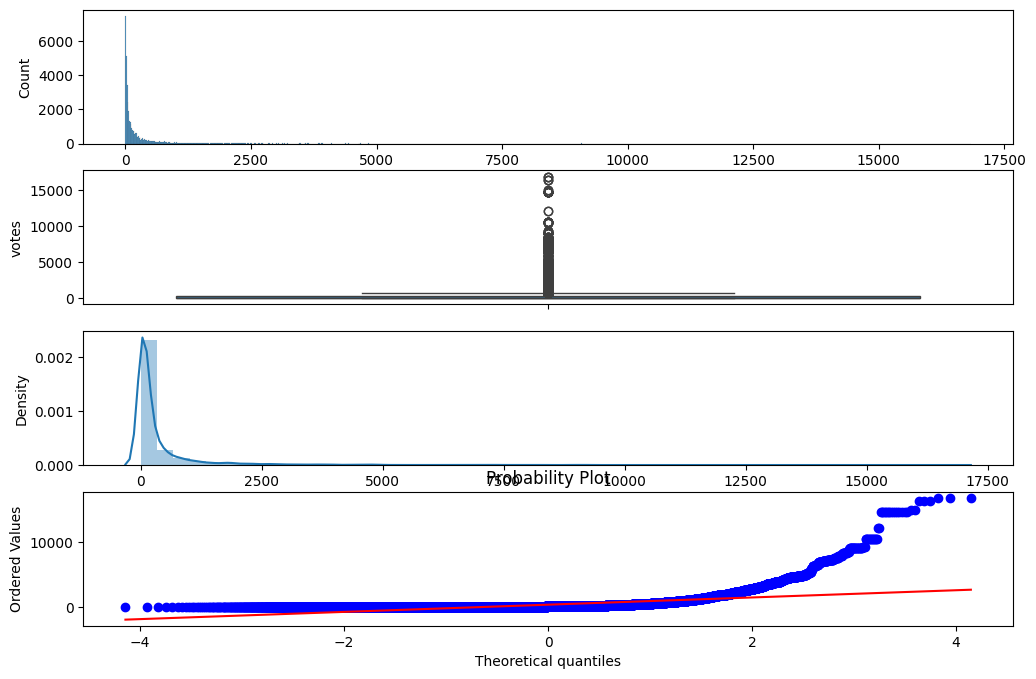

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

In [ ]:
data['votes']= np.log1p((data['votes']))

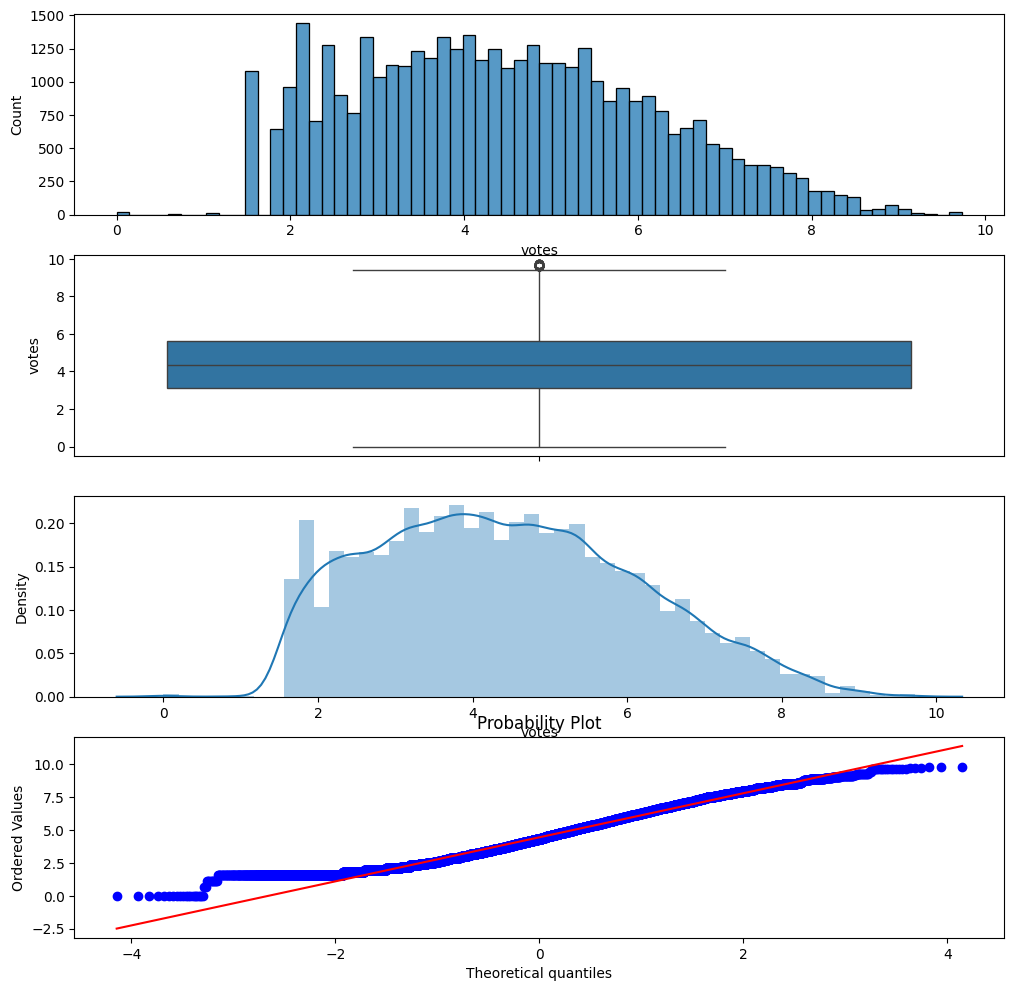

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(411)
sns.histplot(data['votes'])

plt.subplot(412)
sns.boxplot(data['votes'])

plt.subplot(413)
sns.distplot(data['votes'])


plt.subplot(414)
stats.probplot(data['votes'] , plot=plt)

plt.show()

In [ ]:
data.dtypes

votes                                 float64
location                              float64
approx_cost(for two people)           float64
listed_in(city)                       float64
target                                  int64
online_order_Yes                         bool
book_table_Yes                           bool
rest_type_Casual Dining                  bool
rest_type_Delivery                       bool
rest_type_Dessert Parlor                 bool
rest_type_Quick Bites                    bool
rest_type_other                          bool
listed_in(type)_Cafes                    bool
listed_in(type)_Delivery                 bool
listed_in(type)_Desserts                 bool
listed_in(type)_Dine-out                 bool
listed_in(type)_Drinks & nightlife       bool
listed_in(type)_Pubs and bars            bool
dtype: object

In [ ]:
X = data.drop('target', axis = 1)

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## getting training & testing data !
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(30516, 17)

In [ ]:
data.shape

(40688, 18)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
predictions = rf_model.predict(X_test)

In [ ]:
predictions

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
accuracy_score(predictions , y_test)

0.9190916240660637

In [ ]:
# Compute the error.. \

confusion_matrix(predictions , y_test)

array([[4877,  428],
       [ 395, 4472]])

In [ ]:
RandomForestClassifier()

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
n_estimator = [int(x) for x in np.linspace(100 , 1200 , num = 3)]

max_feature = ["auto", "sqrt"]

max_depth = [int(x) for x in np.linspace(5 , 30 , num = 3)]

min_samples_split= [5, 10, 100]

In [ ]:
[int(x) for x in np.linspace(100 , 1200 , num = 3)]

[100, 650, 1200]

In [ ]:
[int(x) for x in np.linspace(5 , 30 , num = 3)]

[5, 17, 30]

In [ ]:
random_grid = {
    'n_estimator': n_estimator,
    'max_feature': max_feature,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
}

In [ ]:
random_grid

{'n_estimator': [100, 650, 1200],
 'max_feature': ['auto', 'sqrt'],
 'max_depth': [5, 17, 30],
 'min_samples_split': [5, 10, 100]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator = RandomForestClassifier ()

In [ ]:
rf_random = RandomizedSearchCV(estimator = estimator , param_distributions= random_grid , cv=2 , verbose=2 , n_jobs=-1)

Logistic Regression:
Optimize cost function to find the best fit line to classify 0,1


Sigmoid function: convert yu x W^T xu ->(100) to (0,1), remove impact of outlier

In [ ]:
rf_random.fit(X_train , y_train)

NameError: name 'X_train' is not defined

In [ ]:
rf_random.best_params_ ## getting best values of parameters

In [ ]:
rf_random.best_estimator_ ## getting best model(ie optimised model)

In [ ]:
rf_opt = RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=650)

In [ ]:
rf_opt.fit(X_train , y_train)

In [ ]:
predictions_opt = rf_opt.predict(X_test)

In [ ]:
predictions_opt

In [ ]:
accuracy_score(predictions_opt , y_test)